In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import ols
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
fat=pd.read_csv("C:/Users/91876/Desktop/Kaggle Individual/7_Body fat/bodyfat.csv")

In [4]:
df= pd.DataFrame(fat)

In [5]:
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [6]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [8]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [9]:
df.shape

(252, 15)

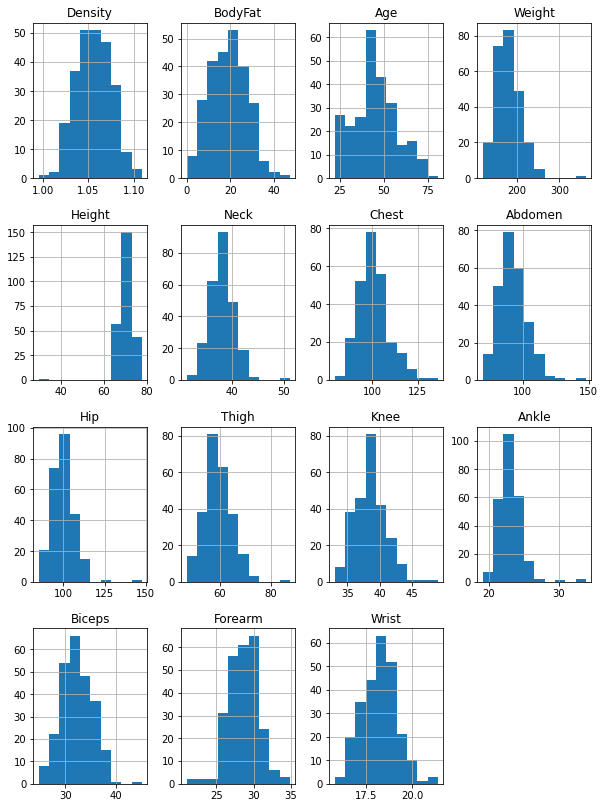

In [10]:
df.hist(figsize=(10,14));

# Exploratory Data Analysis(EDA)

In [11]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

# BodyFat

## it is continuous variable:target variable

In [12]:
df.BodyFat.value_counts()

20.4    4
9.4     3
14.9    3
25.8    3
16.5    3
       ..
15.1    1
23.3    1
32.0    1
29.3    1
30.4    1
Name: BodyFat, Length: 176, dtype: int64

In [13]:
df.BodyFat.describe()

count    252.000000
mean      19.150794
std        8.368740
min        0.000000
25%       12.475000
50%       19.200000
75%       25.300000
max       47.500000
Name: BodyFat, dtype: float64

In [14]:
df.BodyFat.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of BodyFat')

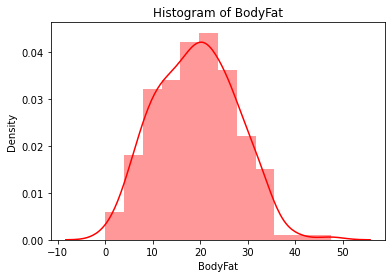

In [15]:
#Histogram
sns.distplot(df.BodyFat, color = 'red')
plt.xlabel('BodyFat')
plt.title('Histogram of BodyFat')

Text(0.5, 1.0, 'Boxplot of BodyFat')

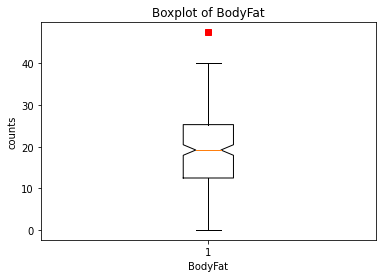

In [16]:
#Boxplot
plt.boxplot(df['BodyFat'],1,'rs',1)
plt.xlabel('BodyFat')
plt.ylabel('counts')
plt.title('Boxplot of BodyFat')

In [17]:
# Outliers Count
IQR = df['BodyFat'].quantile(0.75) - df['BodyFat'].quantile(0.25)
IQR

12.825000000000001

In [18]:
UL = df['BodyFat'].quantile(0.75) + (1.5*IQR)
UL

44.5375

In [19]:
df.BodyFat[(df.BodyFat > UL)].value_counts().sum()

1

In [20]:
df.BodyFat = np.where(df.BodyFat > UL, UL, df.BodyFat)

In [21]:
df.BodyFat[(df.BodyFat > UL)].value_counts().sum()

0

Text(0.5, 1.0, 'Boxplot of BodyFat')

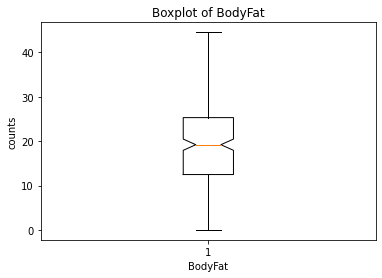

In [22]:
#Boxplot after treatment
plt.boxplot(df['BodyFat'],1,'rs',1)
plt.xlabel('BodyFat')
plt.ylabel('counts')
plt.title('Boxplot of BodyFat')

### 1- Density

In [23]:
df.Density.isnull().sum()

0

In [24]:
df.Density.value_counts().sort_index()

0.9950    1
1.0101    1
1.0140    1
1.0180    1
1.0202    1
         ..
1.0911    1
1.0926    1
1.0983    1
1.0991    1
1.1089    1
Name: Density, Length: 218, dtype: int64

In [25]:
df.Density.describe()

count    252.000000
mean       1.055574
std        0.019031
min        0.995000
25%        1.041400
50%        1.054900
75%        1.070400
max        1.108900
Name: Density, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Density')

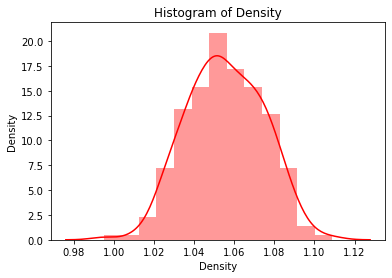

In [26]:
#Histogram
sns.distplot(df.Density, color = 'red')
plt.xlabel('Density')
plt.title('Histogram of Density')

Text(0.5, 1.0, 'Boxplot of Density')

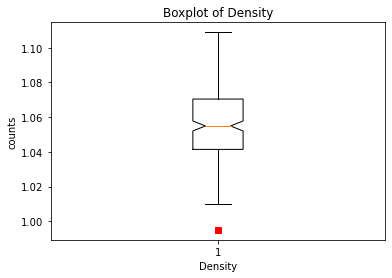

In [27]:
#Boxplot
plt.boxplot(df['Density'],1,'rs',1)
plt.xlabel('Density')
plt.ylabel('counts')
plt.title('Boxplot of Density')

In [30]:
# Outliers Count
IQR1 = df['Density'].quantile(0.75) - df['Density'].quantile(0.25)
IQR1

0.028999999999999915

In [36]:
LL1 = df['Density'].quantile(0.25) - (1.5*IQR1)
LL1

0.9979000000000002

In [37]:
df.Density[(df.Density < LL1)].value_counts().sum()

1

In [38]:
df.Density = np.where(df.Density < LL1, LL1, df.Density)

In [39]:
df.Density[(df.Density < LL1)].value_counts().sum()

0

Text(0.5, 1.0, 'Boxplot of Density')

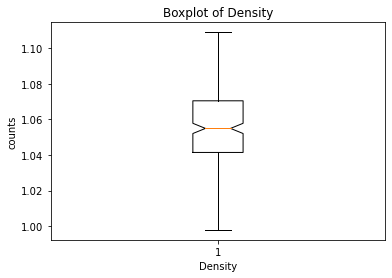

In [40]:
#Boxplot after treatment
plt.boxplot(df['Density'],1,'rs',1)
plt.xlabel('Density')
plt.ylabel('counts')
plt.title('Boxplot of Density')

In [41]:
from scipy.stats import pearsonr

In [83]:
# Convert dataframe into series
list1=df["Density"]
list2=df["BodyFat"]

In [84]:
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.988


### Pearson correlation is: -0.988


In [33]:
fat.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

### 2- Age

In [44]:
df.Age.value_counts().unique()

array([17, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1],
      dtype=int64)

In [45]:
df.Age.describe()

count    252.000000
mean      44.884921
std       12.602040
min       22.000000
25%       35.750000
50%       43.000000
75%       54.000000
max       81.000000
Name: Age, dtype: float64

In [46]:
df.Age.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Age')

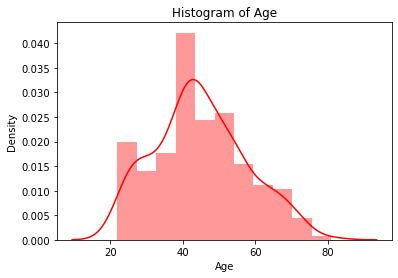

In [48]:
#Histogram
sns.distplot(df.Age, color = 'red')
plt.xlabel('Age')
plt.title('Histogram of Age')

Text(0.5, 1.0, 'Boxplot of Age')

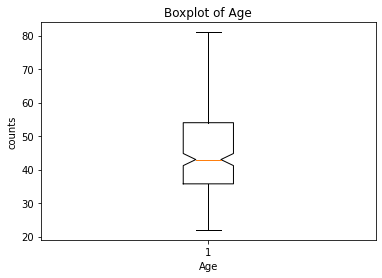

In [49]:
#Boxplot
plt.boxplot(df['Age'],1,'rs',1)
plt.xlabel('Age')
plt.ylabel('counts')
plt.title('Boxplot of Age')

In [82]:
mod1=ols("Age~BodyFat",data=df).fit()
sm.stats.anova_lm(mod1)

,df,sum_sq,mean_sq,F,PR(>F)
BodyFat,1.0,3401.092739,3401.092739,23.320348,0.000002
Residual,250.0,36460.569960,145.842280,NaN,NaN


### here p value=0.000003,it is less than 0.05.hence it is good predictor

In [51]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

### 3- Weight

In [52]:
df.Weight.value_counts()

152.25    3
168.25    3
168.00    3
177.25    3
170.75    3
         ..
171.50    1
212.75    1
168.50    1
191.75    1
177.50    1
Name: Weight, Length: 197, dtype: int64

In [53]:
df.Weight.describe()

count    252.000000
mean     178.924405
std       29.389160
min      118.500000
25%      159.000000
50%      176.500000
75%      197.000000
max      363.150000
Name: Weight, dtype: float64

In [54]:
df.Weight.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Weight')

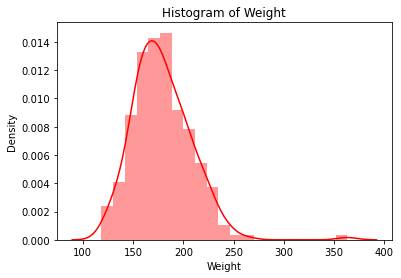

In [55]:
#Histogram
sns.distplot(df.Weight, color = 'red')
plt.xlabel('Weight')
plt.title('Histogram of Weight')

Text(0.5, 1.0, 'Boxplot of Weight')

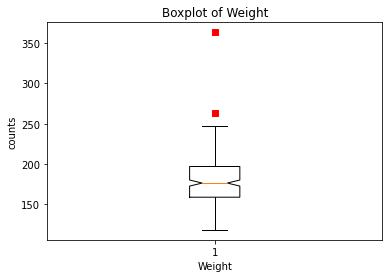

In [56]:
#Boxplot
plt.boxplot(df['Weight'],1,'rs',1)
plt.xlabel('Weight')
plt.ylabel('counts')
plt.title('Boxplot of Weight')

In [57]:
# Outliers Count
IQR3 = df['Weight'].quantile(0.75) - df['Weight'].quantile(0.25)
IQR3

38.0

In [58]:
UL3 = df['Weight'].quantile(0.75) + (1.5*IQR3)
UL3

254.0

In [59]:
df.Weight[(df.Weight > UL3)].value_counts().sum()

2

In [60]:
df.Weight = np.where(df.Weight > UL3, UL3, df.Weight)

In [61]:
df.Weight[(df.Weight > UL3)].value_counts().sum()

0

Text(0.5, 1.0, 'Boxplot of Weight')

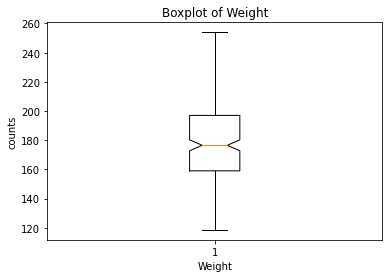

In [62]:
#Boxplot after treatment
plt.boxplot(df['Weight'],1,'rs',1)
plt.xlabel('Weight')
plt.ylabel('counts')
plt.title('Boxplot of Weight')

In [80]:
# Convert dataframe into series
list1=df["Weight"]
list2=df["BodyFat"]

In [81]:
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.627


### Pearsons correlation: 0.627

### 4- Height

In [66]:
df.Height.value_counts().sort_index()

29.50     1
64.00     2
64.75     1
65.00     1
65.50     2
65.75     6
66.00     2
66.25     1
66.50     2
66.75     4
67.00     5
67.25     6
67.50    11
67.75     8
68.00     6
68.25     7
68.50     7
68.75     7
69.00     5
69.25    12
69.50    12
69.75     9
70.00    10
70.25     6
70.50     7
70.75     6
71.00     5
71.25     7
71.50    14
71.75     6
72.00     7
72.25    12
72.50     5
72.75     6
73.00     4
73.25     5
73.50     7
73.75     4
74.00     4
74.25     5
74.50     6
74.75     2
75.00     1
75.25     1
75.50     1
76.00     2
77.50     1
77.75     1
Name: Height, dtype: int64

In [67]:
df.Height.describe()

count    252.000000
mean      70.148810
std        3.662856
min       29.500000
25%       68.250000
50%       70.000000
75%       72.250000
max       77.750000
Name: Height, dtype: float64

In [68]:
df.Height.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Height')

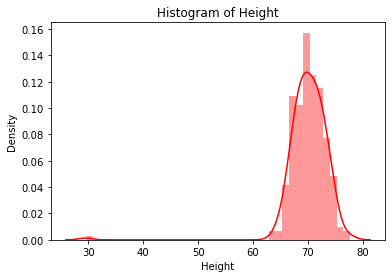

In [69]:
#Histogram
sns.distplot(df.Height, color = 'red')
plt.xlabel('Height')
plt.title('Histogram of Height')

Text(0.5, 1.0, 'Boxplot of Height')

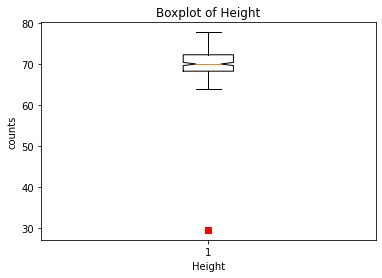

In [70]:
#Boxplot
plt.boxplot(df['Height'],1,'rs',1)
plt.xlabel('Height')
plt.ylabel('counts')
plt.title('Boxplot of Height')

In [72]:
# Outliers Count
IQR4 = df['Height'].quantile(0.75) - df['Height'].quantile(0.25)
IQR4

4.0

In [73]:
LL4 = df['Height'].quantile(0.25) - (1.5*IQR4)
LL4

62.25

In [74]:
df.Height[(df.Height < LL4)].value_counts().sum()

1

In [75]:
df.Height = np.where(df.Height < LL4, LL4, df.Height)

In [76]:
df.Height[(df.Height < LL4)].value_counts().sum()

0

Text(0.5, 1.0, 'Boxplot of Height')

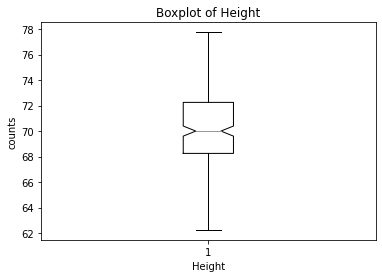

In [77]:
#Boxplot after treatment
plt.boxplot(df['Height'],1,'rs',1)
plt.xlabel('Height')
plt.ylabel('counts')
plt.title('Boxplot of Height')

In [79]:
mod2=ols("Height~BodyFat",data=df).fit()
sm.stats.anova_lm(mod2)

,df,sum_sq,mean_sq,F,PR(>F)
BodyFat,1.0,2.770689,2.770689,0.391211,0.532234
Residual,250.0,1770.583229,7.082333,NaN,NaN


### here p value=0.53,it is greater  than 0.05,bad predictor.

In [85]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

### 5- Neck

In [86]:
df.Neck.value_counts()

38.5    12
38.0    10
37.4     8
36.5     7
37.8     7
        ..
34.1     1
34.8     1
41.2     1
33.2     1
35.0     1
Name: Neck, Length: 90, dtype: int64

In [87]:
df.Neck.describe()

count    252.000000
mean      37.992063
std        2.430913
min       31.100000
25%       36.400000
50%       38.000000
75%       39.425000
max       51.200000
Name: Neck, dtype: float64

In [88]:
df.Neck.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Neck')

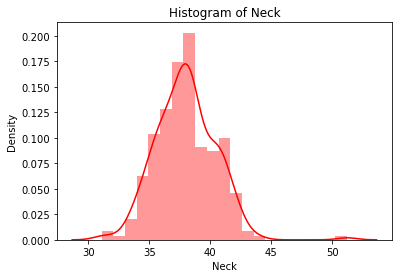

In [89]:
#Histogram
sns.distplot(df.Neck, color = 'red')
plt.xlabel('Neck')
plt.title('Histogram of Neck')

Text(0.5, 1.0, 'Boxplot of Neck')

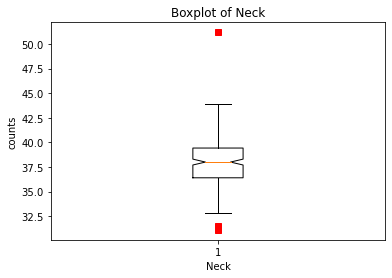

In [90]:
#Boxplot
plt.boxplot(df['Neck'],1,'rs',1)
plt.xlabel('Neck')
plt.ylabel('counts')
plt.title('Boxplot of Neck')

In [91]:
# Outliers Count
IQR5 = df['Neck'].quantile(0.75) - df['Neck'].quantile(0.25)
IQR5

3.0249999999999986

In [92]:
UL5 = df['Neck'].quantile(0.75) + (1.5*IQR5)
UL5

43.96249999999999

In [93]:
LL5 = df['Neck'].quantile(0.25) - (1.5*IQR5)
LL5

31.8625

In [94]:
df.Neck[(df.Neck > UL5)].value_counts().sum()

1

In [95]:
df.Neck[(df.Neck < LL5)].value_counts().sum()

2

In [96]:
df.Neck = np.where(df.Neck > UL5, UL5, df.Neck)

In [97]:
df.Neck = np.where(df.Neck < LL5, LL5, df.Neck)

In [98]:
df.Neck[(df.Neck > UL5)].value_counts().sum()

0

In [99]:
df.Neck[(df.Neck < LL5)].value_counts().sum()

0

Text(0.5, 1.0, 'Boxplot of Neck')

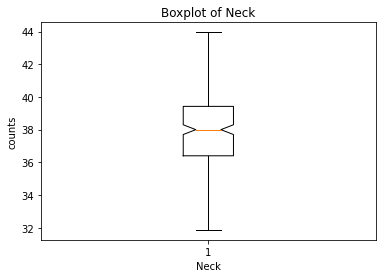

In [100]:
#Boxplot after treatment
plt.boxplot(df['Neck'],1,'rs',1)
plt.xlabel('Neck')
plt.ylabel('counts')
plt.title('Boxplot of Neck')

In [101]:
mod4=ols("Neck~BodyFat",data=df).fit()
sm.stats.anova_lm(mod4)

,df,sum_sq,mean_sq,F,PR(>F)
BodyFat,1.0,323.623874,323.623874,80.410305,7.328353e-17
Residual,250.0,1006.164183,4.024657,NaN,NaN


#### here p value=7.328353e-17,it is less than 0.05.hence it is good predictor.

In [102]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

### 6- Chest

In [103]:
df.Chest.value_counts().sort_index()

79.3     1
83.4     1
85.1     1
86.0     1
86.7     1
        ..
119.8    1
119.9    1
121.6    1
128.3    1
136.2    1
Name: Chest, Length: 174, dtype: int64

In [104]:
df.Chest.describe()

count    252.000000
mean     100.824206
std        8.430476
min       79.300000
25%       94.350000
50%       99.650000
75%      105.375000
max      136.200000
Name: Chest, dtype: float64

In [105]:
df.Chest.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Chest')

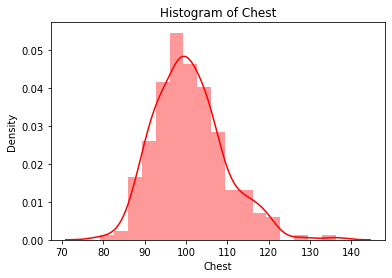

In [106]:
#Histogram
sns.distplot(df.Chest, color = 'red')
plt.xlabel('Chest')
plt.title('Histogram of Chest')

Text(0.5, 1.0, 'Boxplot of Chest')

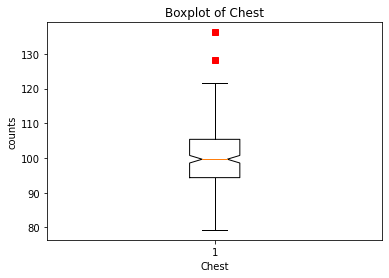

In [107]:
#Boxplot
plt.boxplot(df['Chest'],1,'rs',1)
plt.xlabel('Chest')
plt.ylabel('counts')
plt.title('Boxplot of Chest')

In [108]:
# Outliers Count
IQR6 = df['Chest'].quantile(0.75) - df['Chest'].quantile(0.25)
IQR6

11.024999999999991

In [109]:
UL6 = df['Chest'].quantile(0.75) + (1.5*IQR6)
UL6

121.9125

In [110]:
df.Chest[(df.Chest > UL6)].value_counts().sum()

2

In [111]:
df.Chest = np.where(df.Chest > UL6, UL6, df.Chest)

In [112]:
df.Chest[(df.Chest > UL6)].value_counts().sum()

0

Text(0.5, 1.0, 'Boxplot of Chest')

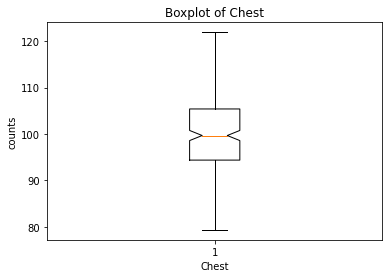

In [113]:
#Boxplot after treatment
plt.boxplot(df['Chest'],1,'rs',1)
plt.xlabel('Chest')
plt.ylabel('counts')
plt.title('Boxplot of Chest')

In [114]:
mod6=ols("Chest~BodyFat",data=df).fit()
sm.stats.anova_lm(mod6)

,df,sum_sq,mean_sq,F,PR(>F)
BodyFat,1.0,8347.496589,8347.496589,249.233291,2.024097e-39
Residual,250.0,8373.175744,33.492703,NaN,NaN


### here p value=2.024097e-39,it is less than 0.05.hence it is good predictor.

In [115]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

### 7- Abdomen

In [116]:
df.Abdomen.value_counts().sort_index()

69.4     1
70.4     1
72.8     1
73.7     1
73.9     1
        ..
115.9    1
118.0    1
122.1    1
126.2    1
148.1    1
Name: Abdomen, Length: 185, dtype: int64

In [117]:
df.Abdomen.isnull().sum()

0

In [118]:
df.Abdomen.describe()

count    252.000000
mean      92.555952
std       10.783077
min       69.400000
25%       84.575000
50%       90.950000
75%       99.325000
max      148.100000
Name: Abdomen, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Abdomen')

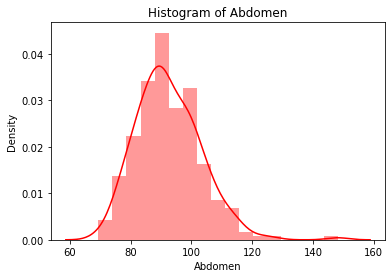

In [119]:
#Histogram
sns.distplot(df.Abdomen, color = 'red')
plt.xlabel('Abdomen')
plt.title('Histogram of Abdomen')

Text(0.5, 1.0, 'Boxplot of Abdomen')

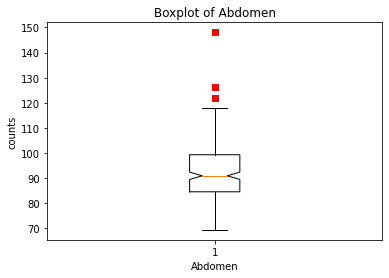

In [120]:
#Boxplot
plt.boxplot(df['Abdomen'],1,'rs',1)
plt.xlabel('Abdomen')
plt.ylabel('counts')
plt.title('Boxplot of Abdomen')

In [121]:
# Outliers Count
IQR7 = df['Abdomen'].quantile(0.75) - df['Abdomen'].quantile(0.25)
IQR7

14.750000000000014

In [122]:
UL7 = df['Abdomen'].quantile(0.75) + (1.5*IQR7)
UL7

121.45000000000002

In [123]:
df.Abdomen[(df.Abdomen > UL7)].value_counts().sum()

3

In [124]:
df.Abdomen = np.where(df.Abdomen > UL7, UL7, df.Abdomen)

In [125]:
df.Abdomen[(df.Abdomen > UL7)].value_counts().sum()

0

Text(0.5, 1.0, 'Boxplot of Abdomen')

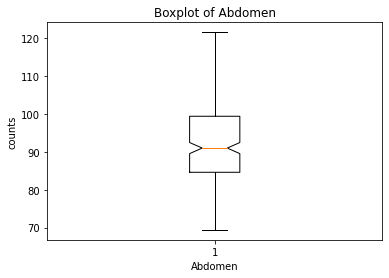

In [126]:
#Boxplot after treatment
plt.boxplot(df['Abdomen'],1,'rs',1)
plt.xlabel('Abdomen')
plt.ylabel('counts')
plt.title('Boxplot of Abdomen')

In [127]:
mod7=ols("Abdomen~BodyFat",data=df).fit()
sm.stats.anova_lm(mod7)

,df,sum_sq,mean_sq,F,PR(>F)
BodyFat,1.0,18228.556530,18228.55653,544.655478,1.009062e-64
Residual,250.0,8367.012388,33.46805,NaN,NaN


### here p value=1.009062e-64,it is less than 0.05.hence it is good predictor.

In [128]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

### 8- Hip

In [129]:
df.Hip.value_counts().sort_index()

85.0     1
85.3     1
87.2     1
87.5     1
87.6     1
        ..
114.4    2
115.5    1
116.1    1
125.6    1
147.7    1
Name: Hip, Length: 152, dtype: int64

In [130]:
df.Hip.describe()

count    252.000000
mean      99.904762
std        7.164058
min       85.000000
25%       95.500000
50%       99.300000
75%      103.525000
max      147.700000
Name: Hip, dtype: float64

In [131]:
df.Hip.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Hip')

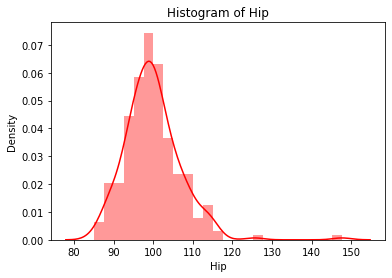

In [132]:
#Histogram
sns.distplot(df.Hip, color = 'red')
plt.xlabel('Hip')
plt.title('Histogram of Hip')

Text(0.5, 1.0, 'Boxplot of Hip')

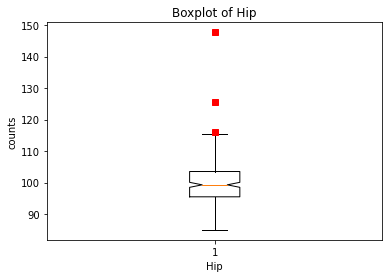

In [133]:
#Boxplot
plt.boxplot(df['Hip'],1,'rs',1)
plt.xlabel('Hip')
plt.ylabel('counts')
plt.title('Boxplot of Hip')

In [134]:
# Outliers Count
IQR8 = df['Hip'].quantile(0.75) - df['Hip'].quantile(0.25)
IQR8

8.025000000000006

In [135]:
UL8 = df['Hip'].quantile(0.75) + (1.5*IQR8)
UL8

115.56250000000001

In [136]:
df.Hip[(df.Hip > UL8)].value_counts().sum()

3

In [137]:
df.Hip = np.where(df.Hip > UL8, UL8, df.Hip)

In [138]:
df.Hip[(df.Hip > UL8)].value_counts().sum()

0

Text(0.5, 1.0, 'Boxplot of Hip')

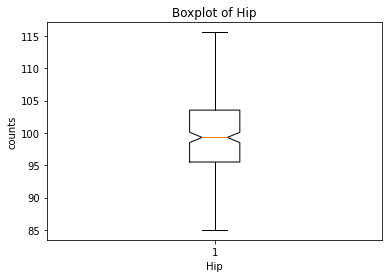

In [139]:
#Boxplot after treatment
plt.boxplot(df['Hip'],1,'rs',1)
plt.xlabel('Hip')
plt.ylabel('counts')
plt.title('Boxplot of Hip')

In [140]:
mod8=ols("Hip~BodyFat",data=df).fit()
sm.stats.anova_lm(mod8)

,df,sum_sq,mean_sq,F,PR(>F)
BodyFat,1.0,4337.784389,4337.784389,178.780129,4.011303e-31
Residual,250.0,6065.808886,24.263236,NaN,NaN


### here p value=4.011303e-31,it is less than 0.05.hence it is good predictor.

In [141]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

### 9- Thigh

In [142]:
df.Thigh.value_counts().sort_index()

47.2    1
49.3    1
49.6    1
50.0    2
50.1    2
       ..
71.2    2
72.5    1
72.9    1
74.4    1
87.3    1
Name: Thigh, Length: 139, dtype: int64

In [143]:
df.Thigh.describe()

count    252.000000
mean      59.405952
std        5.249952
min       47.200000
25%       56.000000
50%       59.000000
75%       62.350000
max       87.300000
Name: Thigh, dtype: float64

In [144]:
df.Thigh.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Thigh')

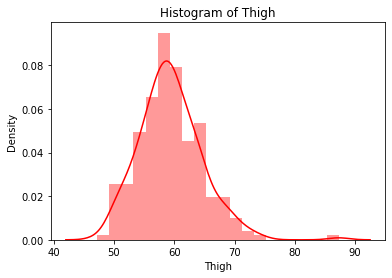

In [145]:
#Histogram
sns.distplot(df.Thigh, color = 'red')
plt.xlabel('Thigh')
plt.title('Histogram of Thigh')

Text(0.5, 1.0, 'Boxplot of Thigh')

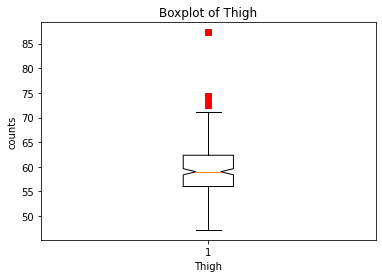

In [146]:
#Boxplot
plt.boxplot(df['Thigh'],1,'rs',1)
plt.xlabel('Thigh')
plt.ylabel('counts')
plt.title('Boxplot of Thigh')

In [147]:
# Outliers Count
IQR9 = df['Thigh'].quantile(0.75) - df['Thigh'].quantile(0.25)
IQR9

6.349999999999994

In [148]:
UL9 = df['Thigh'].quantile(0.75) + (1.5*IQR9)
UL9

71.87499999999999

In [149]:
df.Thigh[(df.Thigh > UL9)].value_counts().sum()

4

In [150]:
df.Thigh = np.where(df.Thigh > UL9, UL9, df.Thigh)

In [151]:
df.Thigh[(df.Thigh > UL9)].value_counts().sum()

0

Text(0.5, 1.0, 'Boxplot of Thigh')

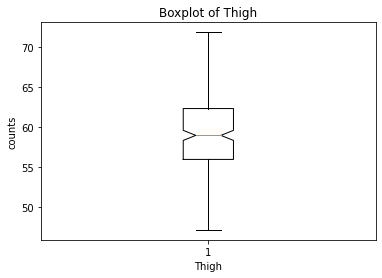

In [152]:
#Boxplot after treatment
plt.boxplot(df['Thigh'],1,'rs',1)
plt.xlabel('Thigh')
plt.ylabel('counts')
plt.title('Boxplot of Thigh')

In [153]:
mod6=ols("Thigh~BodyFat",data=df).fit()
sm.stats.anova_lm(mod6)

,df,sum_sq,mean_sq,F,PR(>F)
BodyFat,1.0,1975.328587,1975.328587,117.392544,1.116589e-22
Residual,250.0,4206.673874,16.826695,NaN,NaN


### here p value=1.116589e-22,it is less than 0.05.hence it is good predictor.

In [154]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

### 10- Knee

In [155]:
df.Knee.value_counts().sort_index()

33.0    1
33.4    1
33.5    1
33.7    1
34.2    1
       ..
44.0    1
44.2    1
45.0    1
46.0    1
49.1    1
Name: Knee, Length: 90, dtype: int64

In [156]:
df.Knee.describe()

count    252.000000
mean      38.590476
std        2.411805
min       33.000000
25%       36.975000
50%       38.500000
75%       39.925000
max       49.100000
Name: Knee, dtype: float64

In [157]:
df.Knee.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Knee')

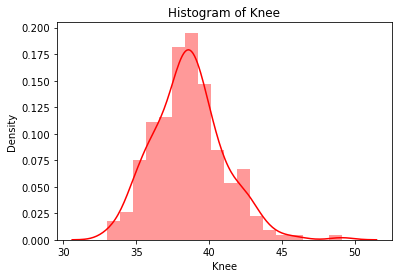

In [158]:
#Histogram
sns.distplot(df.Knee, color = 'red')
plt.xlabel('Knee')
plt.title('Histogram of Knee')

Text(0.5, 1.0, 'Boxplot of Knee')

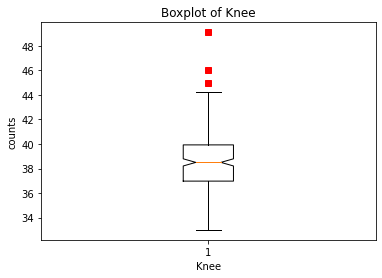

In [159]:
#Boxplot
plt.boxplot(df['Knee'],1,'rs',1)
plt.xlabel('Knee')
plt.ylabel('counts')
plt.title('Boxplot of Knee')

In [160]:
# Outliers Count
IQR10 = df['Knee'].quantile(0.75) - df['Knee'].quantile(0.25)
IQR10

2.9499999999999957

In [161]:
UL10 = df['Knee'].quantile(0.75) + (1.5*IQR10)
UL10

44.349999999999994

In [162]:
df.Knee[(df.Knee > UL10)].value_counts().sum()

3

In [163]:
df.Knee = np.where(df.Knee > UL10, UL10, df.Knee)

In [164]:
df.Knee[(df.Knee > UL10)].value_counts().sum()

0

Text(0.5, 1.0, 'Boxplot of Knee')

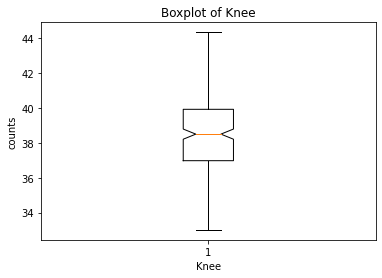

In [165]:
#Boxplot after treatment
plt.boxplot(df['Knee'],1,'rs',1)
plt.xlabel('Knee')
plt.ylabel('counts')
plt.title('Boxplot of Knee')

In [166]:
mod8=ols("Knee~BodyFat",data=df).fit()
sm.stats.anova_lm(mod4)

,df,sum_sq,mean_sq,F,PR(>F)
BodyFat,1.0,323.623874,323.623874,80.410305,7.328353e-17
Residual,250.0,1006.164183,4.024657,NaN,NaN


### here p value=7.328353e-17,it is less than 0.05,it is good predictor.

In [167]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

### 11- Ankle

In [168]:
df.Ankle.value_counts().sort_index()

19.1    1
19.7    1
20.1    1
20.2    1
20.4    2
       ..
26.6    1
27.0    1
29.6    1
33.7    1
33.9    1
Name: Ankle, Length: 61, dtype: int64

In [169]:
df.Ankle.describe()

count    252.000000
mean      23.102381
std        1.694893
min       19.100000
25%       22.000000
50%       22.800000
75%       24.000000
max       33.900000
Name: Ankle, dtype: float64

In [170]:
df.Ankle.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Ankle')

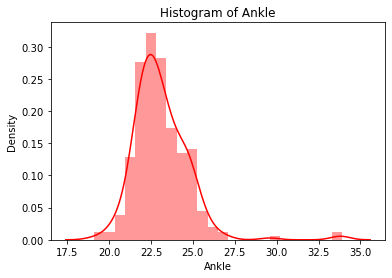

In [171]:
#Histogram
sns.distplot(df.Ankle, color = 'red')
plt.xlabel('Ankle')
plt.title('Histogram of Ankle')

Text(0.5, 1.0, 'Boxplot of Ankle')

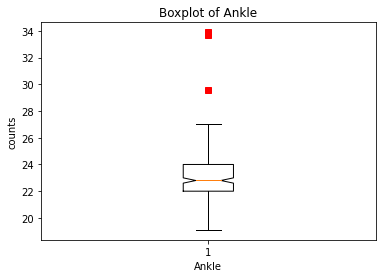

In [172]:
#Boxplot
plt.boxplot(df['Ankle'],1,'rs',1)
plt.xlabel('Ankle')
plt.ylabel('counts')
plt.title('Boxplot of Ankle')

In [173]:
# Outliers Count
IQR11= df['Ankle'].quantile(0.75) - df['Ankle'].quantile(0.25)
IQR11

2.0

In [174]:
UL11 = df['Ankle'].quantile(0.75) + (1.5*IQR11)
UL11

27.0

In [175]:
df.Ankle[(df.Ankle > UL11)].value_counts().sum()

3

In [176]:
df.Ankle = np.where(df.Ankle > UL11, UL11, df.Ankle)

In [177]:
df.Ankle[(df.Ankle > UL11)].value_counts().sum()

0

Text(0.5, 1.0, 'Boxplot of Ankle')

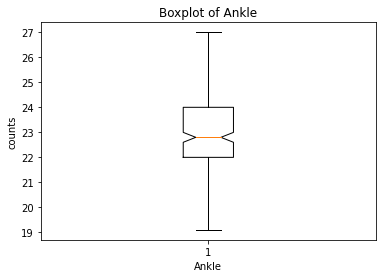

In [178]:
#Boxplot after treatment
plt.boxplot(df['Ankle'],1,'rs',1)
plt.xlabel('Ankle')
plt.ylabel('counts')
plt.title('Boxplot of Ankle')

In [181]:
mod11=ols("Ankle~BodyFat",data=df).fit()
sm.stats.anova_lm(mod11)

,df,sum_sq,mean_sq,F,PR(>F)
BodyFat,1.0,46.875563,46.875563,26.182859,6.192960e-07
Residual,250.0,447.578723,1.790315,NaN,NaN


#### here p value=6.192960e-07,it is less than 0.05.hence it is good predictor.

In [180]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

### 12-Biceps

In [182]:
df.Biceps.value_counts().sort_index()

24.8    1
25.3    1
25.6    1
25.8    1
26.0    1
       ..
38.2    1
38.4    1
38.5    2
39.1    1
45.0    1
Name: Biceps, Length: 104, dtype: int64

In [183]:
df.Biceps.describe()

count    252.000000
mean      32.273413
std        3.021274
min       24.800000
25%       30.200000
50%       32.050000
75%       34.325000
max       45.000000
Name: Biceps, dtype: float64

In [184]:
df.Biceps.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Biceps')

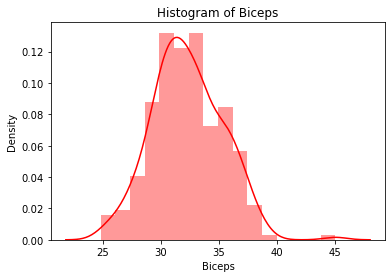

In [185]:
#Histogram
sns.distplot(df.Biceps, color = 'red')
plt.xlabel('Biceps')
plt.title('Histogram of Biceps')

Text(0.5, 1.0, 'Boxplot of Biceps')

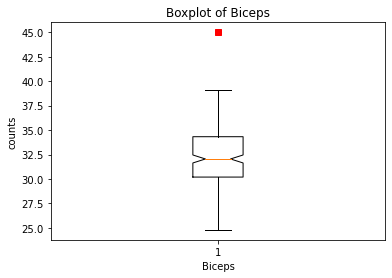

In [186]:
#Boxplot
plt.boxplot(df['Biceps'],1,'rs',1)
plt.xlabel('Biceps')
plt.ylabel('counts')
plt.title('Boxplot of Biceps')

In [187]:
# Outliers Count
IQR12 = df['Biceps'].quantile(0.75) - df['Biceps'].quantile(0.25)
IQR12

4.1249999999999964

In [188]:
UL12 = df['Biceps'].quantile(0.75) + (1.5*IQR12)
UL12

40.51249999999999

In [189]:
df.Biceps[(df.Biceps > UL12)].value_counts().sum()

1

In [190]:
df.Biceps = np.where(df.Biceps > UL12, UL12, df.Biceps)

In [191]:
df.Biceps[(df.Biceps > UL12)].value_counts().sum()

0

Text(0.5, 1.0, 'Boxplot of Biceps')

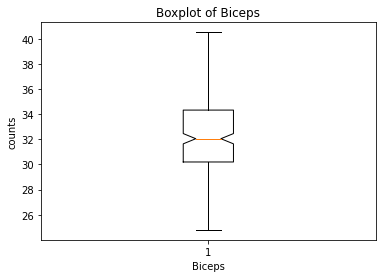

In [192]:
#Boxplot after treatment
plt.boxplot(df['Biceps'],1,'rs',1)
plt.xlabel('Biceps')
plt.ylabel('counts')
plt.title('Boxplot of Biceps')

In [193]:
mod12=ols("Biceps~BodyFat",data=df).fit()
sm.stats.anova_lm(mod12)

,df,sum_sq,mean_sq,F,PR(>F)
BodyFat,1.0,534.443006,534.443006,80.365171,7.456103e-17
Residual,250.0,1662.545483,6.650182,NaN,NaN


#### here p value=7.456103e-17,it is less than 0.05.hence it is good predictor.

In [194]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

### 13- Forearm

In [196]:
df.Forearm.value_counts().value_counts()

1    20
3    17
4    12
5    10
2     9
6     4
9     3
7     2
Name: Forearm, dtype: int64

In [197]:
df.Forearm.describe()

count    252.000000
mean      28.663889
std        2.020691
min       21.000000
25%       27.300000
50%       28.700000
75%       30.000000
max       34.900000
Name: Forearm, dtype: float64

In [198]:
df.Forearm.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Forearm')

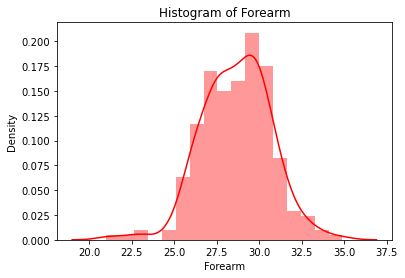

In [199]:
#Histogram
sns.distplot(df.Forearm, color = 'red')
plt.xlabel('Forearm')
plt.title('Histogram of Forearm')

In [200]:
mod13=ols("Forearm~BodyFat",data=df).fit()
sm.stats.anova_lm(mod13)

,df,sum_sq,mean_sq,F,PR(>F)
BodyFat,1.0,134.846048,134.846048,37.876599,2.978119e-09
Residual,250.0,890.035341,3.560141,NaN,NaN


## here p value=2.978119e-09,it is less than 0.05.hence it is good predictor.

In [201]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

### 14- Wrist

In [202]:
df.Wrist.value_counts().sort_index()

15.8     1
16.1     1
16.3     1
16.5     5
16.6     2
16.7     2
16.8     2
16.9     9
17.0     4
17.1     6
17.2     4
17.3     9
17.4    12
17.5     1
17.6    10
17.7    15
17.8     6
17.9     6
18.0     6
18.1     9
18.2    13
18.3    11
18.4    14
18.5    16
18.6     6
18.7     8
18.8    18
18.9     3
19.0    10
19.1     7
19.2     6
19.3     1
19.4     5
19.5     4
19.6     2
19.7     3
19.8     3
19.9     3
20.0     1
20.1     2
20.2     1
20.4     1
20.9     1
21.4     2
Name: Wrist, dtype: int64

In [203]:
df.Wrist.describe()

count    252.000000
mean      18.229762
std        0.933585
min       15.800000
25%       17.600000
50%       18.300000
75%       18.800000
max       21.400000
Name: Wrist, dtype: float64

In [204]:
df.Wrist.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Wrist')

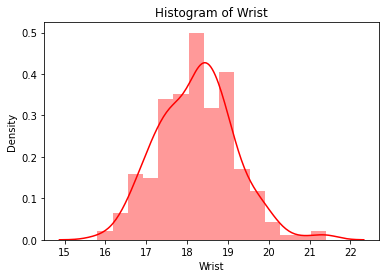

In [205]:
#Histogram
sns.distplot(df.Wrist, color = 'red')
plt.xlabel('Wrist')
plt.title('Histogram of Wrist')

Text(0.5, 1.0, 'Boxplot of Wrist')

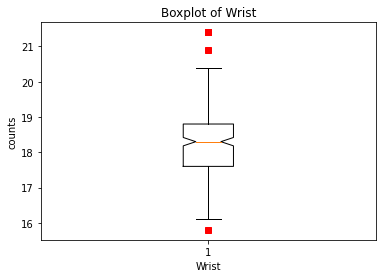

In [206]:
#Boxplot
plt.boxplot(df['Wrist'],1,'rs',1)
plt.xlabel('Wrist')
plt.ylabel('counts')
plt.title('Boxplot of Wrist')

In [207]:
# Outliers Count
IQR14 = df['Wrist'].quantile(0.75) - df['Wrist'].quantile(0.25)
IQR14

1.1999999999999993

In [208]:
UL14 = df['Wrist'].quantile(0.75) + (1.5*IQR14)
UL14

20.6

In [209]:
LL14 = df['Wrist'].quantile(0.25) - (1.5*IQR14)
LL14

15.800000000000002

In [210]:
df.Wrist[(df.Wrist > UL14)].value_counts().sum()

3

In [211]:
df.Wrist[(df.Wrist < LL14)].value_counts().sum()

1

In [212]:
df.Wrist = np.where(df.Wrist > UL14, UL14, df.Wrist)

In [213]:
df.Wrist = np.where(df.Wrist < LL14, LL14, df.Wrist)

In [214]:
df.Wrist[(df.Wrist > UL14)].value_counts().sum()

0

In [215]:
df.Wrist[(df.Wrist < LL14)].value_counts().sum()

0

Text(0.5, 1.0, 'Boxplot of Wrist')

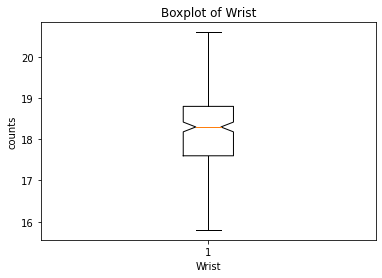

In [217]:
#Boxplot after treatment
plt.boxplot(df['Wrist'],1,'rs',1)
plt.xlabel('Wrist')
plt.ylabel('counts')
plt.title('Boxplot of Wrist')

In [218]:
mod14=ols("Wrist~BodyFat",data=df).fit()
sm.stats.anova_lm(mod14)

,df,sum_sq,mean_sq,F,PR(>F)
BodyFat,1.0,24.267414,24.267414,32.952663,2.725880e-08
Residual,250.0,184.108141,0.736433,NaN,NaN


### here p value=2.725880e-08,it is less than 0.05.hence it is good predictor.

In [220]:
fat.to_csv("C:/Users/91876/Desktop/Kaggle Individual/7_Body fat/Exported files\\EDA_FAT.csv",index=True)